In [11]:
import pandas as pd
import numpy as np
from pycaret.classification import *

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

%config Completer.use_jedi = False

In [2]:
df = pd.read_csv("imputed_data/troponin_pod1_regression_imputed_data01.csv")
df.columns

Index(['Age', 'Room', 'Sex', 'Ht', 'Wt', 'BMI', 'Cr_MELD', 'Na_MELD', 'MELD',
       'DM_Tx',
       ...
       'HR_mean7', 'SBP_mean7', 'DBP_mean7', 'opBgn2Reperf_hr',
       'Reperf2opTer_hr', 'anes_dur_hr', 'op_bgn_hr', 'op_ter_hr', 'op_mon',
       'op_yr'],
      dtype='object', length=104)

In [3]:
columns2log= ['Tnl_ind', 'Tnl_anhe', 'Tnl_reperfusion']
for i, col in enumerate(columns2log) :
    df[col] = df[col].apply(np.log)


0: TnI_pod1 < 0.006
1: 0.006 <= TnI_pod1 < 0.04 (심근손상의 definition이 0.04 이상입니다)
2: TnI_pod1 >= 0.04

1    714
0    536
Name: TnI_pod1, dtype: int64

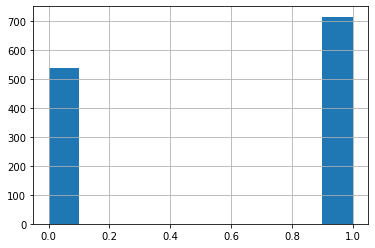

In [4]:
df['TnI_pod1'] = df['TnI_pod1'].apply(lambda x: 0 if x < 0.04 else 1)
df['TnI_pod1'].hist()
display(df['TnI_pod1'].value_counts())

In [5]:
df['TnI_pod1'].dtype

dtype('int64')

In [6]:
continuous_vars = ['Age', 'Ht', 'Wt', 'BMI', 'Cr_MELD', 'Na_MELD',
                   'MELD', 'postHD', 'preHD', 'Alb', 'GFR_MDRD',
                   'Cys_C_GFR', 'Low_opHct', 'CIT', 'WIT', 'GRWR',
                   'Crystalloid', 'Colloid', 'UO', 'RBC', 'FFP',
                   'Cryo', 'Epi_mcg', 'Intraop_Steroid', 'Cr',
                   'Cr_prean', 'Cr_anhe', 'Tnl_ind', 'Tnl_anhe', 
                   'Tnl_reperfusion', 'HR_mean7', 'SBP_mean7',
                   'DBP_mean7', 'opBgn2Reperf_hr', 'Reperf2opTer_hr', 
                   'anes_dur_hr']

In [7]:
for col in df.columns:
    if df[df[col].isnull()].shape[0] !=0 :
        print(col )
        print(df[df[col].isnull()])

In [8]:
# init setup
clf = setup(data=df, target = 'TnI_pod1', train_size=0.8)
            #numeric_imputation = 'median',
            #numeric_features = continuous_vars,
             #ignore_features = ['CAG', 'TimetoCAG'], 
             #normalize=True,
             #pca = True, pca_components = 12,
            #imputation_type='iterative',
#             remove_multicollinearity = True, multicollinearity_threshold = 0.9, 
#             log_experiment = True, 
#             experiment_name = 'mihlto')

# return best model
#best = compare_models()

# return best model based on Recall
best = compare_models(sort = 'auc') #default is 'Accuracy'

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8280,0.8931,0.8421,0.8613,0.8508,0.6477,0.6493,2.7870
xgboost,Extreme Gradient Boosting,0.8210,0.8838,0.8351,0.8563,0.8448,0.6333,0.6351,43.5570
gbc,Gradient Boosting Classifier,0.8210,0.8835,0.8438,0.8492,0.8458,0.6325,0.6338,0.1570
rf,Random Forest Classifier,0.8320,0.8807,0.8643,0.8520,0.8573,0.6531,0.6549,0.2390
lightgbm,Light Gradient Boosting Machine,0.8220,0.8804,0.8352,0.8580,0.8454,0.6355,0.6377,0.1290
et,Extra Trees Classifier,0.7900,0.8663,0.8730,0.7914,0.8291,0.5584,0.5657,0.1260
ada,Ada Boost Classifier,0.7830,0.8569,0.8162,0.8153,0.8142,0.5531,0.5558,0.1210
lda,Linear Discriminant Analysis,0.7700,0.8561,0.8196,0.7940,0.8060,0.5237,0.5253,0.0140
nb,Naive Bayes,0.6220,0.7304,0.4762,0.7949,0.5916,0.2802,0.3139,0.1050
dt,Decision Tree Classifier,0.7320,0.7246,0.7698,0.7732,0.7699,0.4485,0.4510,0.1060


In [9]:
cbc = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7900,0.8466,0.7627,0.8654,0.8108,0.5770,0.5828
1,0.8400,0.9215,0.8475,0.8772,0.8621,0.6717,0.6723
2,0.8200,0.8703,0.8448,0.8448,0.8448,0.6305,0.6305
3,0.8500,0.9516,0.8448,0.8909,0.8673,0.6951,0.6964
4,0.7800,0.8522,0.8621,0.7812,0.8197,0.5394,0.5437
5,0.9000,0.9372,0.8966,0.9286,0.9123,0.7961,0.7967
6,0.8400,0.9335,0.8448,0.8750,0.8596,0.6737,0.6743
7,0.8700,0.8994,0.8793,0.8947,0.8870,0.7340,0.7342
8,0.7900,0.8485,0.8448,0.8033,0.8235,0.5647,0.5658
9,0.8000,0.8703,0.7931,0.8519,0.8214,0.5948,0.5968


In [10]:
tuned_cbc = tune_model(cbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7800,0.8334,0.7458,0.8627,0.8000,0.5584,0.5658
1,0.8600,0.9198,0.8644,0.8947,0.8793,0.7128,0.7134
2,0.8200,0.8674,0.8448,0.8448,0.8448,0.6305,0.6305
3,0.8800,0.9544,0.8448,0.9423,0.8909,0.7585,0.7640
4,0.8000,0.8456,0.8621,0.8065,0.8333,0.5840,0.5861
5,0.8900,0.9388,0.8966,0.9123,0.9043,0.7750,0.7751
6,0.8600,0.9298,0.8448,0.9074,0.8750,0.7164,0.7187
7,0.8600,0.8953,0.8793,0.8793,0.8793,0.7126,0.7126
8,0.7900,0.8378,0.8448,0.8033,0.8235,0.5647,0.5658
9,0.8100,0.8654,0.8448,0.8305,0.8376,0.6087,0.6089


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

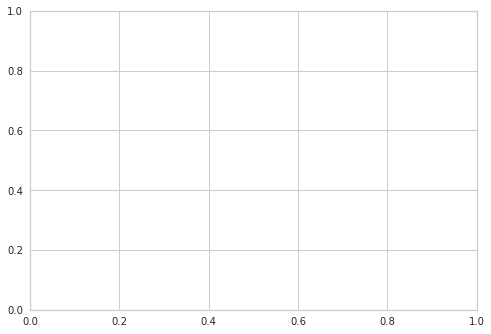

In [13]:
evaluate_model(tuned_cbc)